# Unstructured Data Harvesting: EDGAR - Getting all the CIKs for Mutual Funds

#### Before doing anything, let's import, as always, our urllib library.

In [74]:
import urllib.request

#### EDGAR (Electronic Data Gathering, Analysis, and Retrieval system) provides access to SEC filings by public companies.  These include, but are not limited to forms 10Q, 8K, 13F.
#### For our class, we will initially look into investment information provided by Mutual Funds.

###### If you are completely new to the Mutual Fund Concept, feel free to read the following link:
###### http://www.investopedia.com/university/mutualfunds/
###### For more information of EDGAR and how it works, you can look into the following links:
###### http://www.investopedia.com/articles/fundamental-analysis/10/edgar-analyzing-filings.asp?ad=dirN&qo=investopediaSiteSearch&qsrc=0&o=40186
###### https://www.sec.gov/edgar/quickedgar.htm


##### If we want to know about any mutual fund, we start by searching the funds name in the Mutual Fund search page in EDGAR:
##### https://www.sec.gov/edgar/searchedgar/mutualsearch.html
##### You will notice the following screenshot:

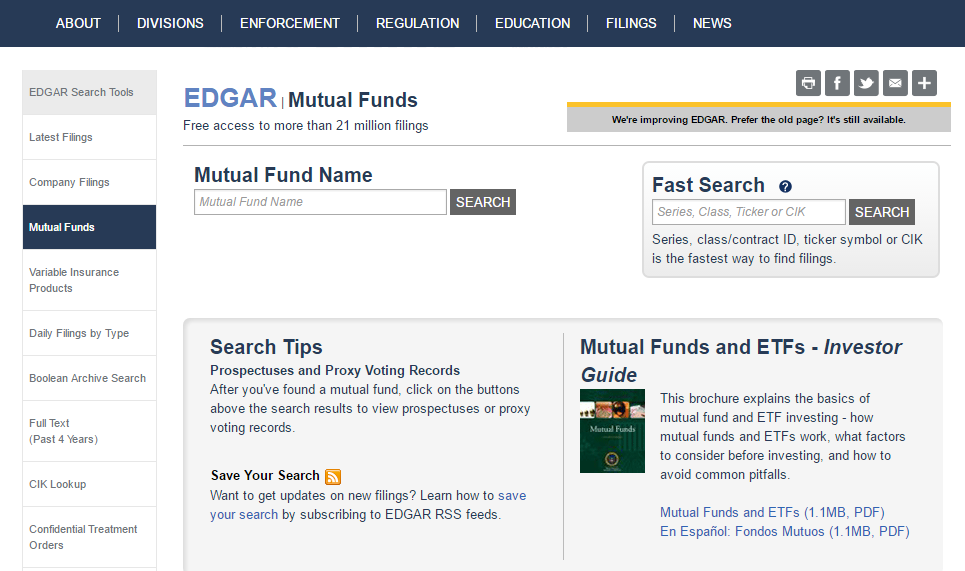

In [75]:
from IPython.display import Image
Image(filename='Files_Directory/Images/Edgar_Mutual_Search_1.png',width=800,height=10)

#### If you search for Vanguard Index Funds (one of the biggest mutual funds as per MarketWatch.com), you will land on the following page :

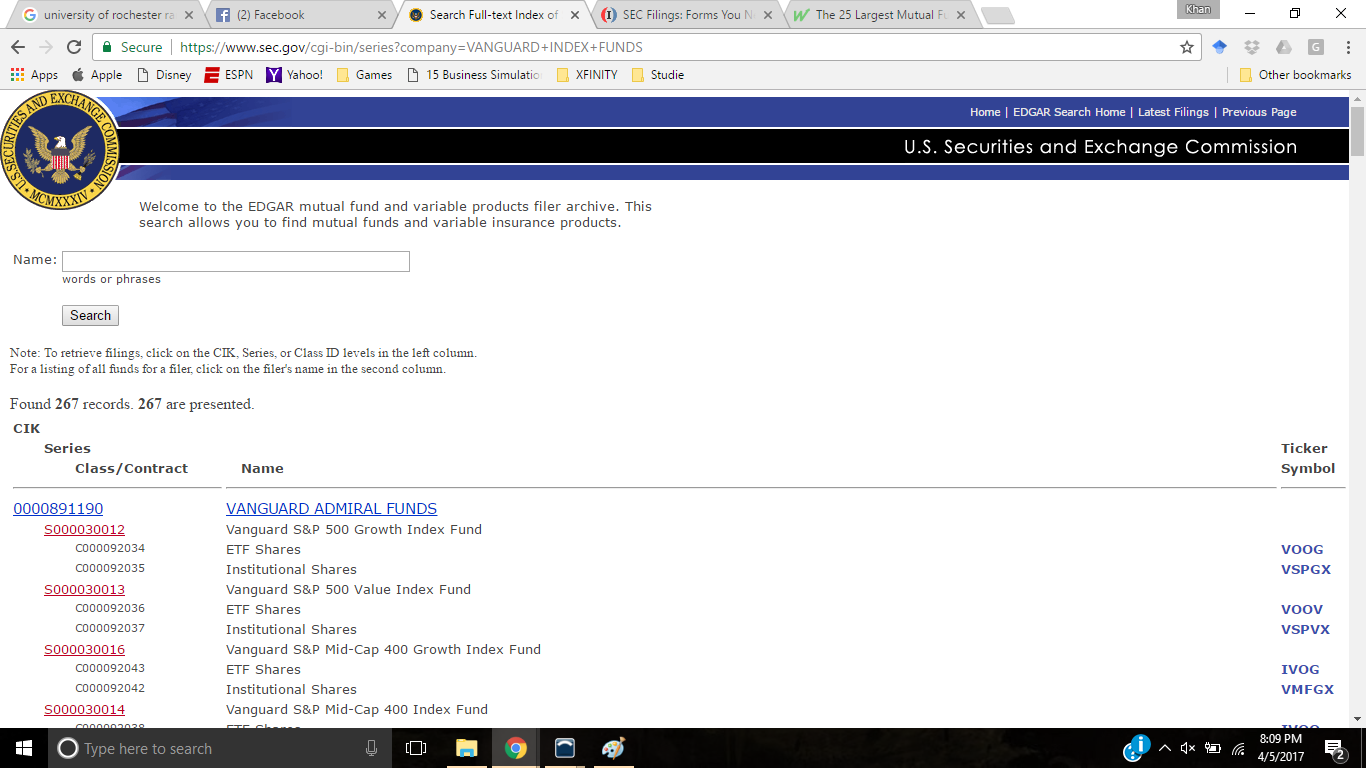

In [76]:
from IPython.display import Image
Image(filename='Files_Directory/Images/Edgar_Mutual_Search_2.png',width=800,height=10)

#### Clicking in one of the entries will get you to the listings page of that certain fund:

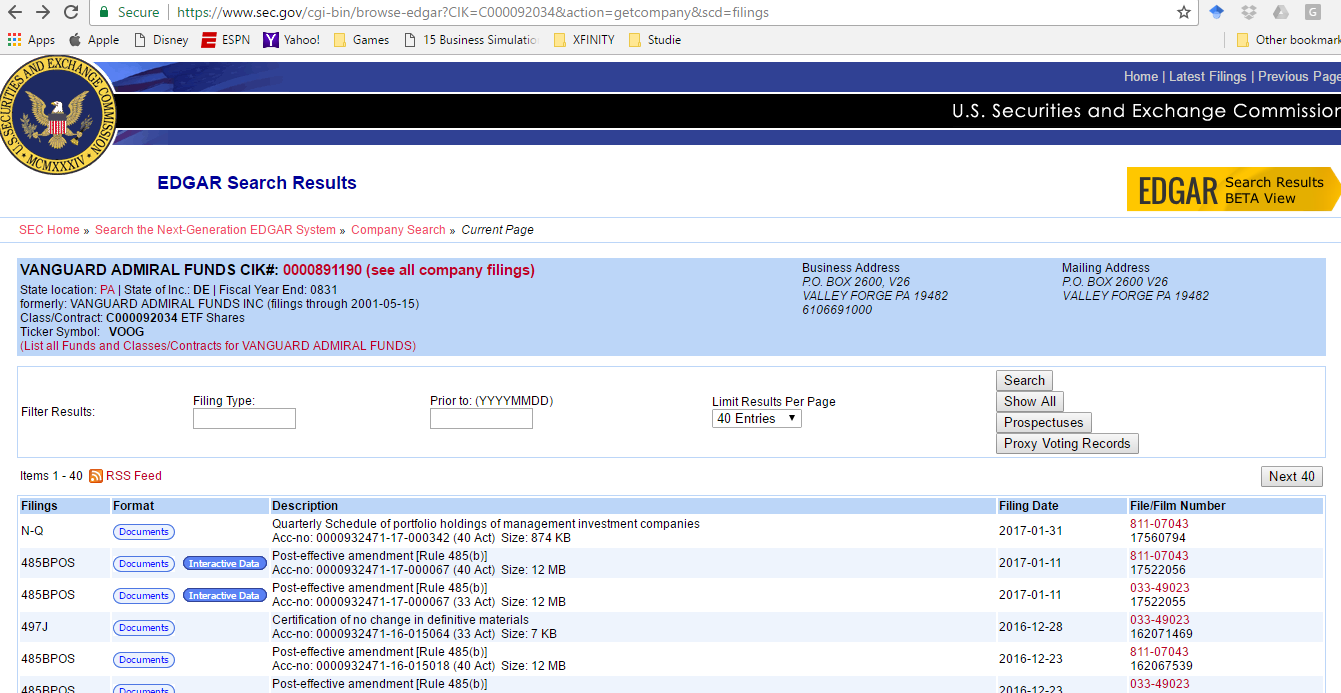

In [77]:
from IPython.display import Image
Image(filename='Files_Directory/Images/Edgar_Mutual_Search_3.png',width=800,height=10)

#### One important thing to note here is the URL:
##### https://www.sec.gov/cgi-bin/browse-edgar?CIK=C000092034&action=getcompany&scd=filings
#### You will notice that one of the key component of this URL is the CIK, which stands for Central Index Key, and each Mutual Fund has their unique CIK. So if we need to work with all the mutual funds, we can just pull up a list of all the CIKs for all the Mutual Funds

#### Unfortunately, EDGAR does not have a list of Mutual Funds according to their CIK, so we will be using a clever technique of searching the EDGAR databased using WildCards. For example, we can get a list of all the mutual funds having the letter "a" by searching for 'a*' :

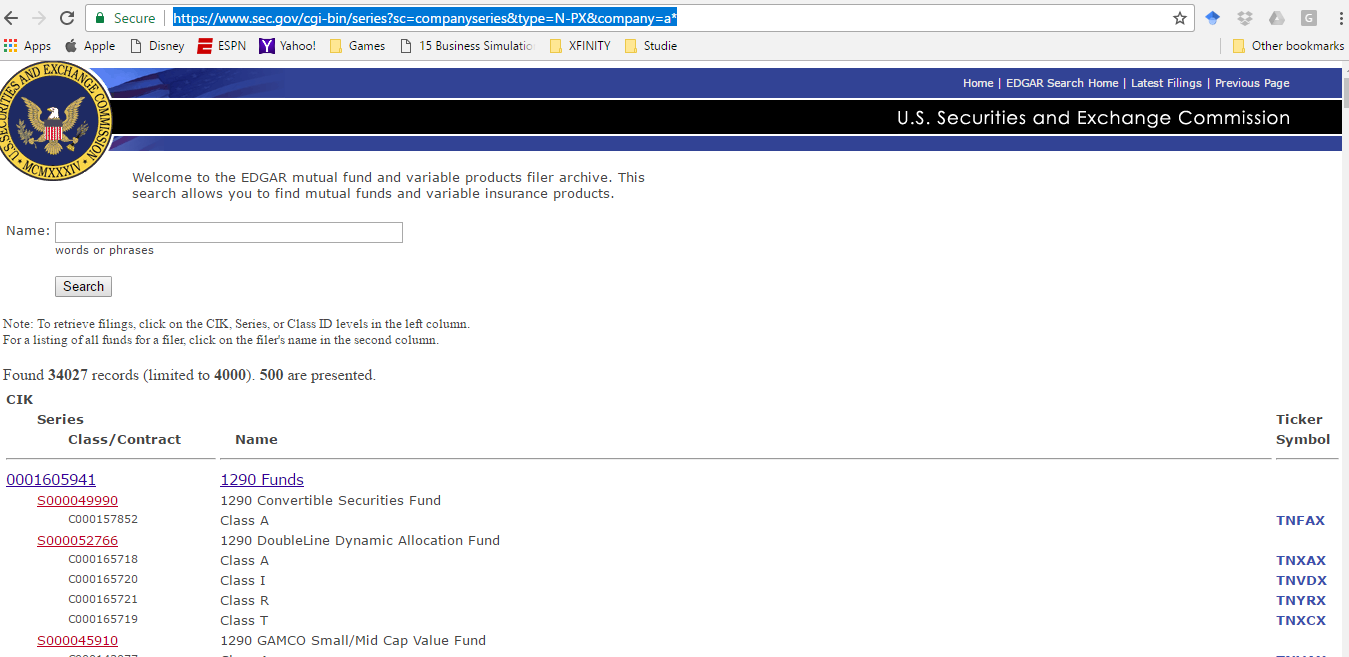

In [78]:
from IPython.display import Image
Image(filename='Files_Directory/Images/Edgar_Mutual_Search_4.png',width=800,height=10)

#### Going to the next page will give us the URL:
##### https://www.sec.gov/cgi-bin/series?company=a%2A&CIK=&start=501&count=500
#### As you can see, the count=500 shows the number of search results being displayed, and start = 501 tells us the start point. If we change the value to start=1 and count=50000, the url looks like:
##### https://www.sec.gov/cgi-bin/series?company=a%2A&CIK=&start=1&count=50000

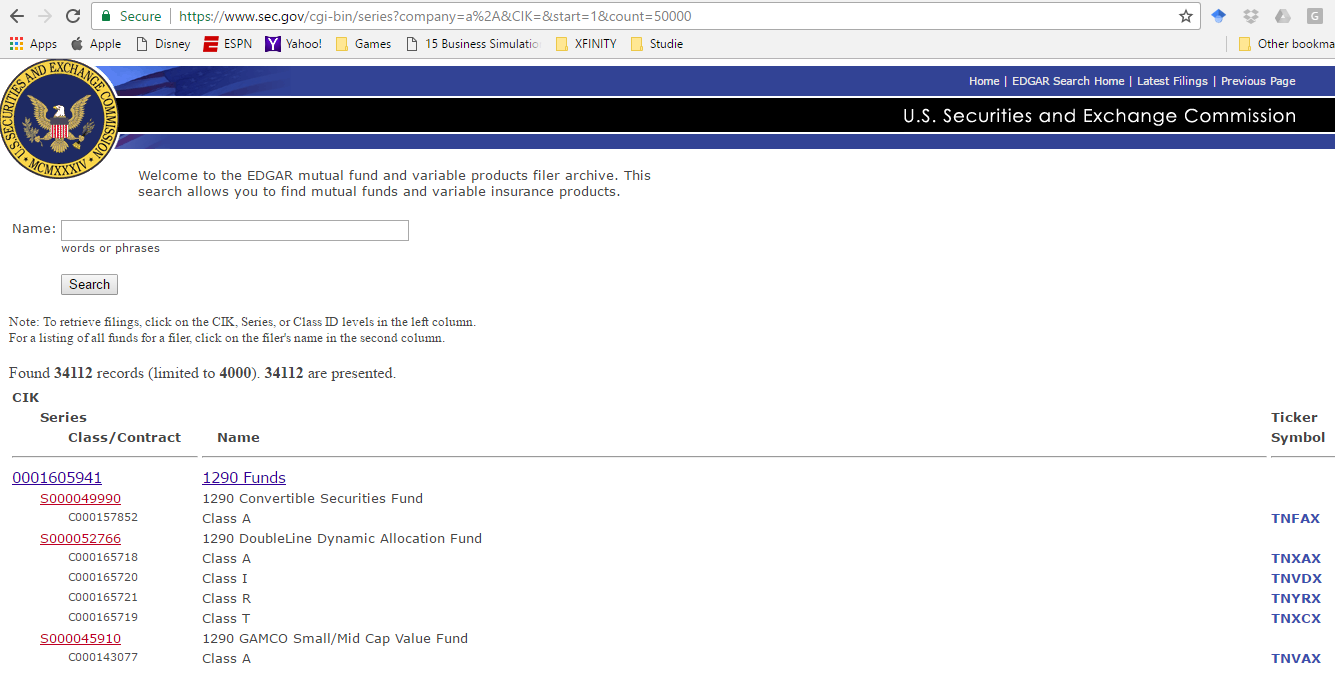

In [79]:
from IPython.display import Image
Image(filename='Files_Directory/Images/Edgar_Mutual_Search_5.png',width=800,height=10)

#### This brings all the search results in one page and takes away the need to change pages regularly.

#### We will use the logic that most of the mutual funds will have at least one vowel in their names, so if we search using all the vowels, and everytime, get the of search results and their CIK, save them in a csv file and clean the file for repetitions, we will have a csv file will all the mutual funds and their CIKs.

#### First we create the empty lists we will be filling up:

In [2]:
wildcards = []
search_urls = []
CIK = []
Fund_Name = []
Vowels = ['a','e','i','o','u']

#### Next we populate the list of wildcards:

In [3]:
for i in Vowels:
    wildcards.append(i + "*")

#### Based on our previous URL, we create a list of URLs with the wildcards incorporated in the urls to get the search results:

In [82]:
for item in wildcards:  
    search_urls.append("https://www.sec.gov/cgi-bin/series?company=" + item + "&CIK=&start=1&count=50000")

In [83]:
search_urls

['https://www.sec.gov/cgi-bin/series?company=a*&CIK=&start=1&count=50000',
 'https://www.sec.gov/cgi-bin/series?company=e*&CIK=&start=1&count=50000',
 'https://www.sec.gov/cgi-bin/series?company=i*&CIK=&start=1&count=50000',
 'https://www.sec.gov/cgi-bin/series?company=o*&CIK=&start=1&count=50000',
 'https://www.sec.gov/cgi-bin/series?company=u*&CIK=&start=1&count=50000']

#### If we check the second entry (name of mutual funds having the letter e):
##### https://www.sec.gov/cgi-bin/series?company=e*&CIK=&start=501&count=50000

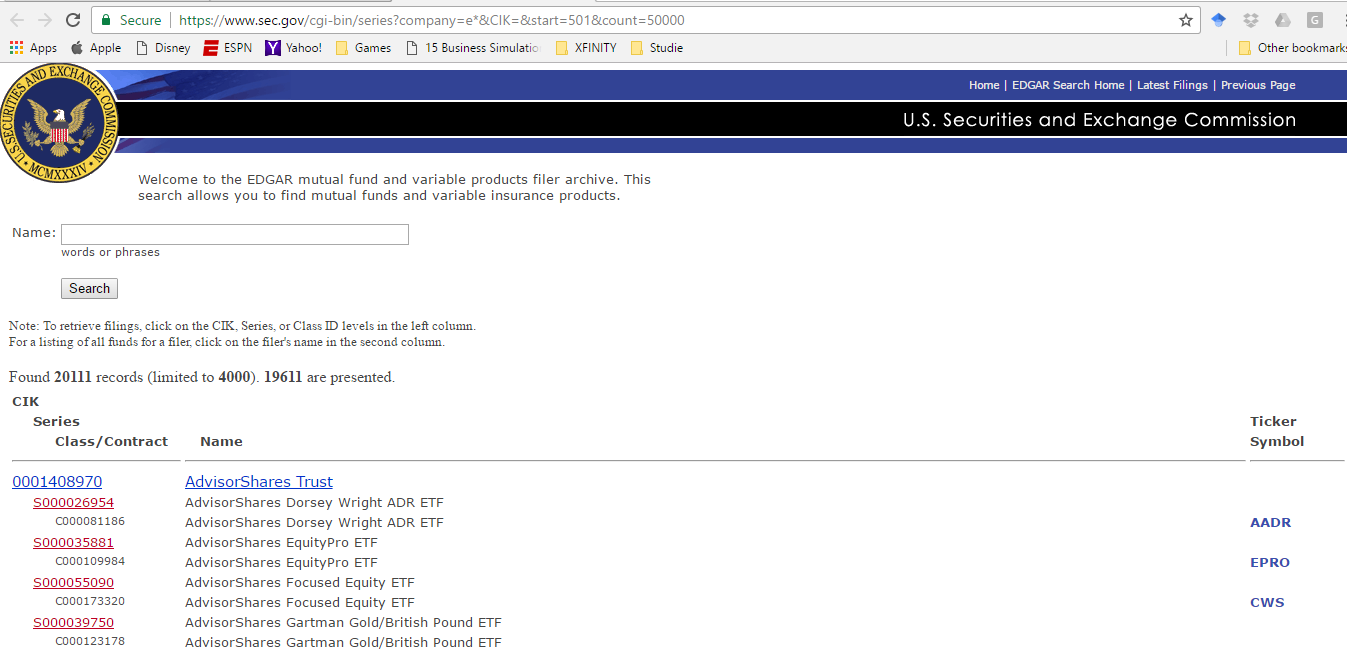

In [84]:
from IPython.display import Image
Image(filename='Files_Directory/Images/Edgar_Mutual_Search_6.png',width=800,height=10)

#### One very handy tool that google chrome has is that it lets us check the html code behind a site. We need the CIK for every Mutual Fund, so we can click near one of the CIKs to see what the html code near CIK is:

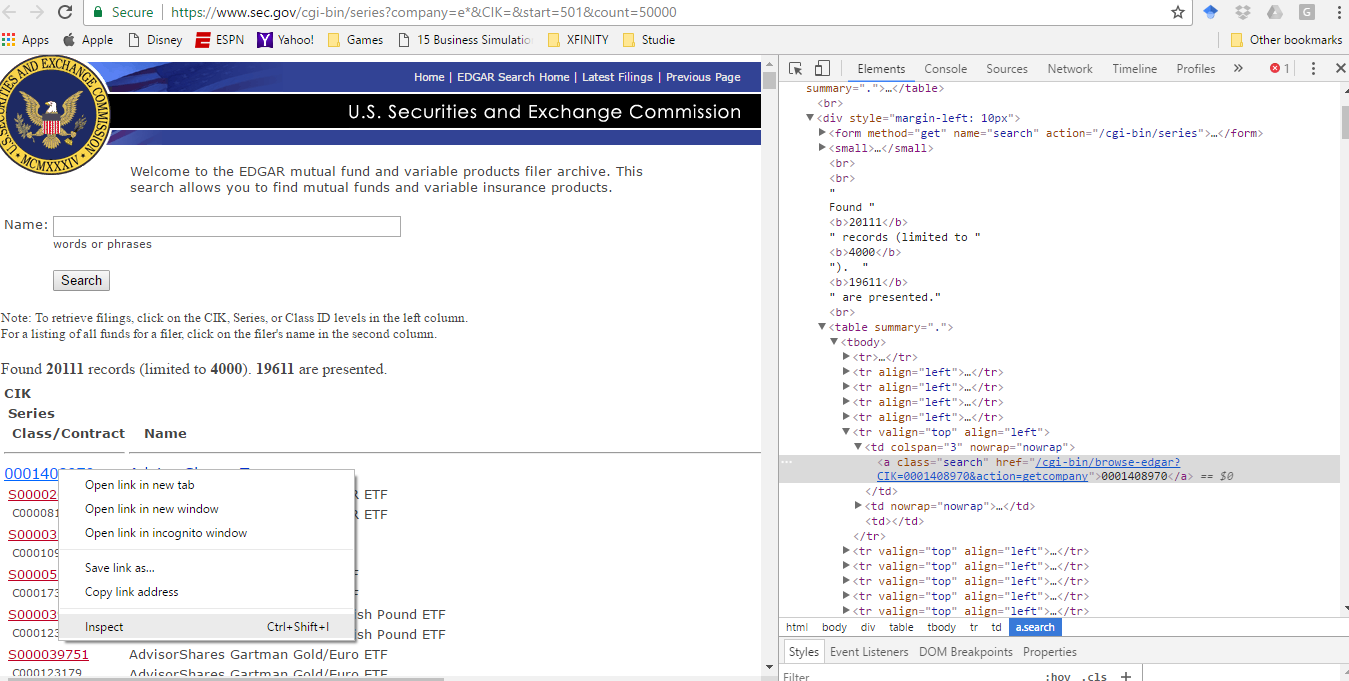

In [85]:
from IPython.display import Image
Image(filename='Files_Directory/Images/Edgar_Mutual_Search_7.png',width=800,height=10)

#### So our objective will be to load each of these search result pages based on the vowel wildcards, and then for each page, read the html code for the page and go near each of the tables, and then go near the string we are interested in, and then collect the string.  Let's first show how to do this for "a".  Then we will do it for all the vowels.

In [86]:
link = search_urls[0]
url = link
html = urllib.request.urlopen(url).read().decode('utf-8') #loading each search page

In [87]:
index = html.find("<table summary=")

In [88]:
html2 = html[index:]
html2[0:2000]

'<table summary="."><tr valign="top"><td align="right"><label for="SearchField">Name:</label></td><td><input type="text" name="company" size="45" id="SearchField" value="">\n<br><small>words or phrases</small><br>&nbsp;</td></tr><tr><td></td><td valign="top">\n<input type="submit" value="Search">\n</td>\n</tr>\n</table></td></tr>\n</table>\n</form>\n<small>Note:  To retrieve filings, click on the CIK, Series, or Class ID levels in the left column.\n<br>For a listing of all funds for a filer, click on the filer\'s name in the second column.\n</small><br><br>\nFound <b>35601</b> records (limited to <b>4000</b>).  <b>35601</b> are presented.<br>\n<table summary=".">\n<tr><th width="2%"></th><th width="2%"></th><th width="10%"></th><th width="70%"></th><th></th></tr>\n<tr align="left"><td align=left colspan="3"><b>CIK</b></td>\n<td align="left" width="60%"></td>\n<td align="left"></td></tr>\n<tr align="left"><td align="left" width="2%"></td>\n<td align="left" colspan="2"><b>Series</b></td>

#### We want to create a list of urls, so we find class = search

In [89]:
index = html2.find('a class="search"')
index

1481

In [90]:
html3 = html2[index:]
html3[0:200]

'a class="search" href="/cgi-bin/browse-edgar?CIK=0001605941&amp;action=getcompany">0001605941</a></td>\n<td nowrap="nowrap"><a class="search" href="/cgi-bin/browse-edgar?CIK=0001605941&amp;action=getco'

In [91]:
start = html3.find("href")+6
start

23

In [92]:
end = html3.find(">")
end

82

In [93]:
href = html3[start:end]
href

'/cgi-bin/browse-edgar?CIK=0001605941&amp;action=getcompany"'

In [97]:
for link in search_urls[0:1]:
    
    url = link
    html = urllib.request.urlopen(url).read().decode('utf-8') #loading each search page

    index = html.find("<table summary=") #going closer to the results table
    html2 = html[index:]

    while html2.find("a class=\"search\" href=\"/cgi-bin/browse-edgar?CIK=") != -1: 
        #We are running a while loop because we want to get everything in the page
        
        index = html2.find("a class=\"search\" href=\"/cgi-bin/browse-edgar?CIK=")
        remaining = html2[index:]
    
        start = remaining.find(">")
        end = remaining.find("<")
        CIK.append(remaining[start+1:end])
    
        remaining = remaining[end:]
        index = remaining.find("</td>")
        remaining = remaining[index:]
    
        index = remaining.find("action=getcompany&amp;scd=series")
        remaining = remaining[index:]
    
        start = remaining.find(">")
        end = remaining.find("<")
        Fund_Name.append(remaining[start+1:end].replace(" ", "_"))
    
        remaining = remaining[end:]
        index = remaining.find("</td>")
        html2 = remaining[index:]


In [98]:
len(CIK)

5792

In [99]:
CIK[0:10]

['0001605941',
 '0001319067',
 '0001341290',
 '0001341289',
 '0001172221',
 '0000003794',
 '0000081443',
 '0001090504',
 '0001274676',
 '0000019614']

#### We can see few of the Fund Names

In [100]:
Fund_Name[0:10]

['1290_Funds',
 '360_Funds',
 'AARP_Funds',
 'AARP_Portfolios',
 'AB_BLENDED_STYLE_SERIES_INC',
 'AB_BOND_FUND,_INC.',
 'AB_CAP_FUND,_INC.',
 'AB_CORE_OPPORTUNITIES_FUND,_INC.',
 'AB_CORPORATE_SHARES',
 'AB_DISCOVERY_GROWTH_FUND,_INC.']

#### Another idea can be to paginate through the results. Although loading all of 50,000 gives us all of the results, what would have happened if we had more than 50,000. So instead of having URLS with 50,000 records, we could get 500 records per page and then change pages to get all the results. For this we will first get the total number of results:

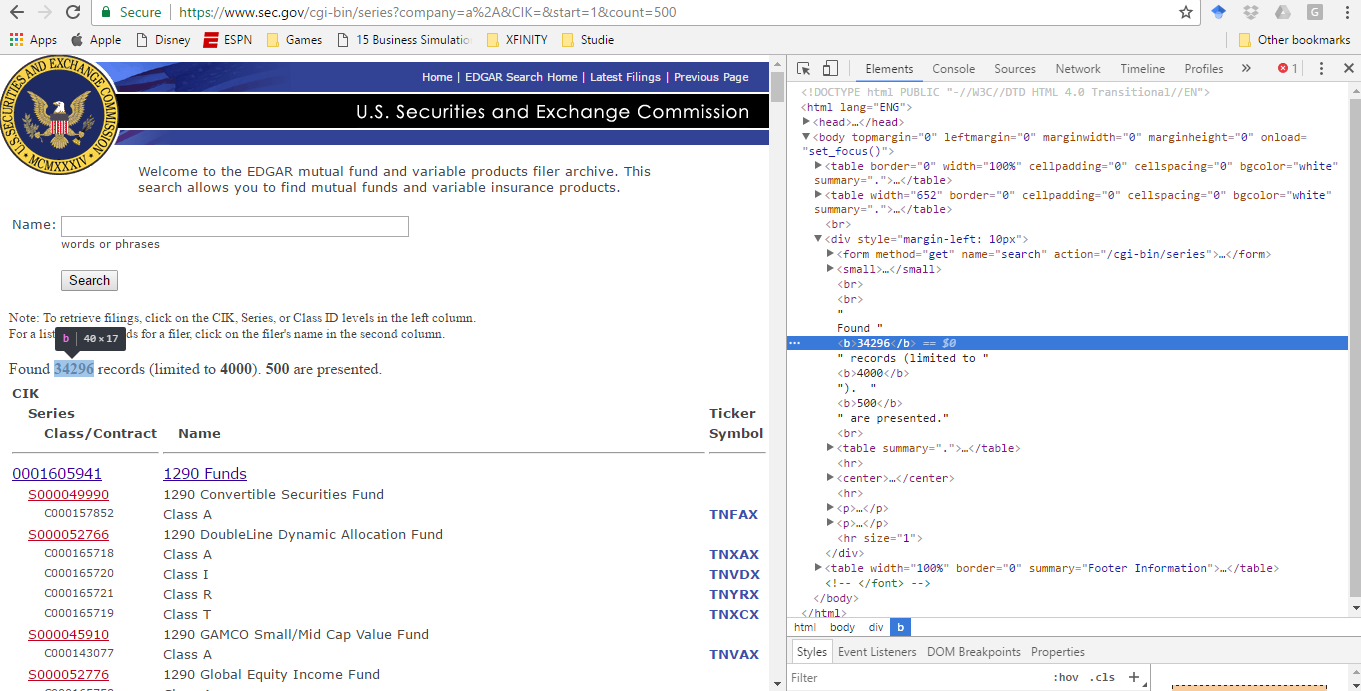

In [101]:
from IPython.display import Image
Image(filename='Files_Directory/Images/Edgar_Mutual_Search_8.png',width=800,height=10)

#### Lets look at the code that can paginate over all the results:

In [102]:
CIK = []
Fund_Name = []

In [103]:
url = 'https://www.sec.gov/cgi-bin/series?company=a*&CIK=&start=1&count=500'
html = urllib.request.urlopen(url).read().decode('utf-8')

#### Find the next button

In [104]:
index = html.find('count=500">[NEXT]')
index

170783

In [105]:
html2 = html[index-20:index+100]
html2

'=&amp;start=501&amp;count=500">[NEXT]</a></center>\n<hr>\n<p><a href="/">SEC Home</a> | <a href="/cgi-bin/series">SEC Sear'

In [106]:
start=html2.find('start=')+6
start

12

In [107]:
end = html2.find('&amp;count=')
end

15

In [108]:
start_number = html2[start:end]
start_number

'501'

#### let's do the same process that we did before, but for the sake of time, we will go through only the first 3 pages, but for the first two wildcards

In [109]:
for item in wildcards[0:2]:  
    url = 'https://www.sec.gov/cgi-bin/series?company='+item+'&CIK=&start=1&count=500'
    html = urllib.request.urlopen(url).read().decode('utf-8')
    
    last_page = False
    
    counter = 0  #only use this if you want to stop at certain page.
    
    while last_page == False:
    
        index = html.find("<table summary=") #going closer to the results table
        html2 = html[index:]

        #SAME CODE AS BEFORE STARTS HERE
        while html2.find("a class=\"search\" href=\"/cgi-bin/browse-edgar?CIK=") != -1: 

            #We are running a while loop because we want to get everything in the page
            index = html2.find("a class=\"search\" href=\"/cgi-bin/browse-edgar?CIK=")
            remaining = html2[index:]

            start = remaining.find(">")
            end = remaining.find("<")
            CIK.append(remaining[start+1:end])

            remaining = remaining[end:]
            index = remaining.find("</td>")
            remaining = remaining[index:]

            index = remaining.find("action=getcompany&amp;scd=series")
            remaining = remaining[index:]

            start = remaining.find(">")
            end = remaining.find("<")
            Fund_Name.append(remaining[start+1:end].replace(" ", "_"))

            remaining = remaining[end:]
            index = remaining.find("</td>")
            html2 = remaining[index:]
        #SAME CODE AS BEFORE ENDS
        
        index = html.find('count=500">[NEXT]')
        
        if index == -1:
            last_page = True
        
        else:
        
            html2 = html[index-20:index+100]
            start=html2.find('start=')+6
            end = html2.find('&amp;count=')
            start_number = html2[start:end]

            url = 'https://www.sec.gov/cgi-bin/series?company='+item+'&CIK=&start='+start_number+'&count=500'

            html = urllib.request.urlopen(url).read().decode('utf-8')
        
        counter += 1
        if counter == 3:
            last_page = True    #only use this to limit the number of pages to go through.  You can drop this later.
    
        
        
        



In [110]:
Fund_Name[0:10]

['1290_Funds',
 '360_Funds',
 'AARP_Funds',
 'AARP_Portfolios',
 'AB_BLENDED_STYLE_SERIES_INC',
 'AB_BOND_FUND,_INC.',
 'AB_CAP_FUND,_INC.',
 'AB_CAP_FUND,_INC.',
 'AB_CORE_OPPORTUNITIES_FUND,_INC.',
 'AB_CORPORATE_SHARES']

#### Next we can save the names and the CIK into a TEXT file

In [111]:
Output_File = open("Files_Directory/Edgar/Mutual_Fund_CIK.txt", "w")

Output_File.write("CIK\tCompany\n")

for x in range(0, len(CIK)):
    Output_File.write(CIK[x] + '\t' + Fund_Name[x] + '\t\n')

Output_File.close()

#### If you open the file, you can see that there is one problem with it; since we searched for vowel wildcards, we had a repititions of names, so the total number of mutual funds and their CIK is unnaturally high. So we need to trim the list for repititions:

In [112]:
Input_File = open("Files_Directory/Edgar/Mutual_Fund_CIK.txt", "r")

Output_File2 = open("Files_Directory/Edgar/Mutual_Fund_CIK_Sorted.txt", "w")

listLines = []

for line in Input_File:

    if line in listLines:
        continue
# this portion of the code tells us the for loop that if a line is already there in the list, skip the line or else add it to the list
    else:
        Output_File2.write(line)
        listLines.append(line)

Output_File2.close()

Input_File.close()